In [20]:
import pandas as pd
df=pd.read_csv(
    "Data/netflix_titles.csv")
df.head()
import plotly.express as px


Missing values per column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


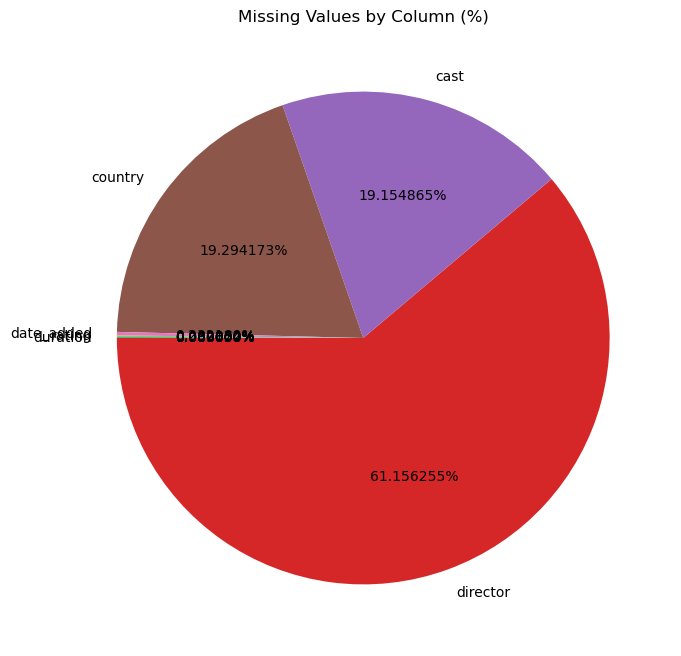

In [38]:
#Import data and identify missing values  and create visualization of it.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Data/netflix_titles.csv")

# Display first few rows
#print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Pie chart of missing values
plt.figure(figsize=(8, 8))
missing_values.plot(kind='pie', autopct='%1f%%', startangle=180)
plt.title("Missing Values by Column (%)")
plt.ylabel("")  # Hides the y-label
plt.show()


In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [27]:
# Define the mapping dictionary
rating_map = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

# Map the rating column to new categories and create a new column 'rating_category'
df['rating_category'] = df['rating'].map(rating_map)

# If there are any ratings not in the map, they will become NaN — you can fill them if you want:
df['rating_category'] = df['rating_category'].fillna('Unknown')

# Now check the updated column
print(df[['rating', 'rating_category']].head())


  rating rating_category
0  PG-13           Teens
1  TV-MA          Adults
2  TV-MA          Adults
3  TV-MA          Adults
4  TV-MA          Adults


In [39]:
import pandas as pd

# Load dataset
df = pd.read_csv("Data/netflix_titles.csv")

# The 'country' column may contain multiple countries separated by commas, so we split and explode
df_countries = df.dropna(subset=['country'])
df_countries = df_countries.assign(country=df_countries['country'].str.split(', ')).explode('country')

# Function to get top countries by content type
def top_countries_by_type(df, content_type, top_n=5):
    df_type = df[df['type'] == content_type]
    country_counts = df_type['country'].value_counts().head(top_n)
    return country_counts

# Top countries for Movies
top_movie_countries = top_countries_by_type(df_countries, 'Movie')
print("Top Countries with Most Movies:")
print(top_movie_countries)

print("\n")

# Top countries for TV Shows
top_tv_countries = top_countries_by_type(df_countries, 'TV Show')
print("Top Countries with Most TV Shows:")
print(top_tv_countries)


Top Countries with Most Movies:
United States     2751
India              962
United Kingdom     532
Canada             319
France             303
Name: country, dtype: int64


Top Countries with Most TV Shows:
United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
Name: country, dtype: int64


Content Type Distribution:
 Movie      6131
TV Show    2676
Name: type, dtype: int64


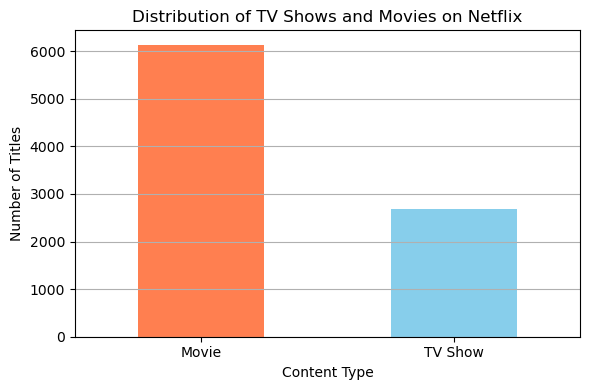

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Data/netflix_titles.csv")

# Count how many are 'Movie' and how many are 'TV Show'
type_counts = df['type'].value_counts()

# Print the counts
print("Content Type Distribution:\n", type_counts)

# Plot a bar chart
plt.figure(figsize=(6, 4))
type_counts.plot(kind='bar', color=['coral', 'skyblue'])

plt.title("Distribution of TV Shows and Movies on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


      year  percentage_added
0   2008.0          0.022735
1   2009.0          0.022735
2   2010.0          0.011368
3   2011.0          0.147778
4   2012.0          0.034103
5   2013.0          0.125043
6   2014.0          0.272820
7   2015.0          0.932136
8   2016.0          4.876662
9   2017.0         13.504604
10  2018.0         18.745027
11  2019.0         22.916903
12  2020.0         21.359554
13  2021.0         17.028532


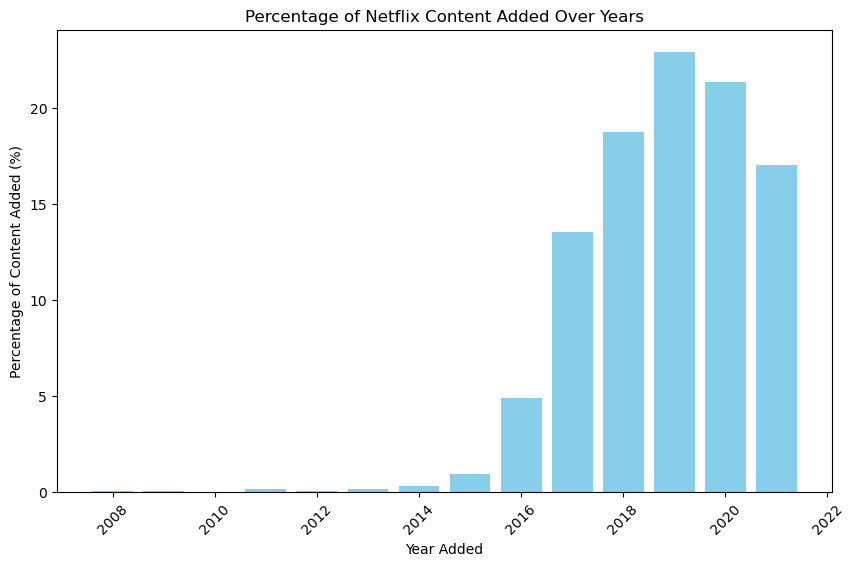

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Data/netflix_titles.csv")

# Convert 'date_added' to datetime, handle errors gracefully
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count how many titles were added each year
yearly_counts = df['year_added'].value_counts().sort_index()

# Calculate percentage of total content added each year
yearly_percentage = (yearly_counts / yearly_counts.sum()) * 100

# Create a DataFrame for easier handling
content_by_year = pd.DataFrame({
    'year': yearly_percentage.index,
    'percentage_added': yearly_percentage.values
})

# Print the percentage data
print(content_by_year)

# Visualize with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(content_by_year['year'], content_by_year['percentage_added'], color='skyblue')
plt.xlabel('Year Added')
plt.ylabel('Percentage of Content Added (%)')
plt.title('Percentage of Netflix Content Added Over Years')
plt.xticks(rotation=45)
plt.show()


In [29]:
import pandas as pd

# Load dataset
df = pd.read_csv("Data/netflix_titles.csv")

# --- Director with highest shows ---

# Some director fields may be NaN, so drop those before counting
directors = df['director'].dropna()

# Count how many titles each director has
director_counts = directors.value_counts()

# Get the director(s) with the highest count
top_director = director_counts.idxmax()
top_director_count = director_counts.max()

print(f"Director with highest shows: {top_director} ({top_director_count} titles)")

# --- Actor(s) with highest shows ---

# The 'cast' column contains comma-separated actors. First, drop NaNs
casts = df['cast'].dropna()

# Split actor strings into lists, flatten into one big list
all_actors = casts.str.split(', ').explode()

# Count appearances of each actor
actor_counts = all_actors.value_counts()

# Get the actor(s) with the highest count
top_actor = actor_counts.idxmax()
top_actor_count = actor_counts.max()

print(f"Actor with highest shows: {top_actor} ({top_actor_count} titles)")


Director with highest shows: Rajiv Chilaka (19 titles)
Actor with highest shows: Anupam Kher (43 titles)


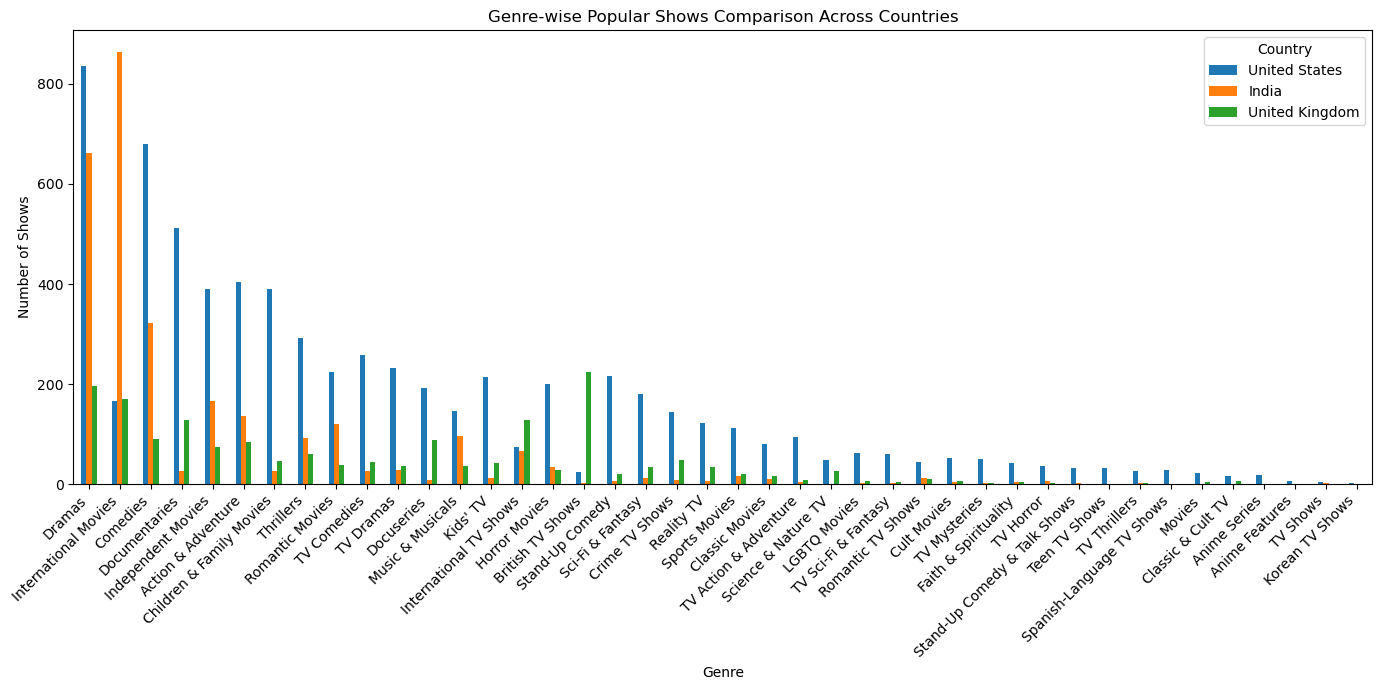

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Data/netflix_titles.csv")

# List of countries to compare
countries = ['United States', 'India', 'United Kingdom']

# Prepare a DataFrame to hold genre counts per country
genre_country_counts = pd.DataFrame()

for country in countries:
    # Filter rows containing the country
    df_country = df[df['country'].str.contains(country, na=False)]

    # Split genres and explode to one per row
    genres = df_country['listed_in'].str.split(', ').explode()

    # Count genres
    counts = genres.value_counts()

    # Create DataFrame and rename column to country name
    counts_df = counts.rename_axis('Genre').reset_index(name=country)

    # Merge with main DataFrame on Genre
    if genre_country_counts.empty:
        genre_country_counts = counts_df
    else:
        genre_country_counts = pd.merge(genre_country_counts, counts_df, on='Genre', how='outer')

# Fill NaN with 0 (genres not present in some countries)
genre_country_counts = genre_country_counts.fillna(0)

# Sort genres by total shows across countries (descending)
genre_country_counts['Total'] = genre_country_counts[countries].sum(axis=1)
genre_country_counts = genre_country_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot grouped bar chart
genre_country_counts.set_index('Genre').plot(kind='bar', figsize=(14,7))

plt.title('Genre-wise Popular Shows Comparison Across Countries')
plt.ylabel('Number of Shows')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


In [41]:
import pandas as pd

# Load dataset
df = pd.read_csv("Data/netflix_titles.csv")

# Drop rows with NaN in 'cast' column (no actors listed)
df_cast = df.dropna(subset=['cast'])

# Function to get top 5 actors for a given type ('Movie' or 'TV Show')
def top_5_actors(df, content_type):
    # Filter by type
    df_type = df[df['type'] == content_type]
    
    # Split 'cast' column by comma, explode to separate rows
    actors = df_type['cast'].str.split(', ').explode()
    
    # Count actor appearances and get top 5
    top_actors = actors.value_counts().head(5)
    return top_actors

# Top 5 actors in Movies
top_5_movie_actors = top_5_actors(df_cast, 'Movie')
print("Top 5 Actors in Movies:")
print(top_5_movie_actors)

print("\n")

# Top 5 actors in TV Shows
top_5_tv_actors = top_5_actors(df_cast, 'TV Show')
print("Top 5 Actors in TV Shows:")
print(top_5_tv_actors)


Top 5 Actors in Movies:
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Akshay Kumar        30
Om Puri             30
Name: cast, dtype: int64


Top 5 Actors in TV Shows:
Takahiro Sakurai    25
Yuki Kaji           19
Daisuke Ono         17
Junichi Suwabe      17
Ai Kayano           17
Name: cast, dtype: int64
